# HIERARCHICAL REGRESSION | PIGS DATA SET

## 01 Load libraries

In [1]:
import arviz as az
import bambi as bmb
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import xarray as xr

In [2]:
az.style.use("arviz-darkgrid")
SEED = 7355608

## 02 Load data

In [3]:
df = sm.datasets.get_rdataset('dietox', 'geepack').data
df.describe()

,Pig,Litter,Start,Weight,Feed,Time
count,861.000000,861.000000,861.000000,861.000000,789.000000,861.000000
mean,6238.319396,12.135889,25.672701,60.725769,80.728645,6.480836
std,1323.845928,7.427252,3.624336,24.978881,52.877736,3.444735
min,4601.000000,1.000000,15.000000,15.000000,3.300003,1.000000
25%,4857.000000,5.000000,23.799990,38.299990,32.800003,3.000000
50%,5866.000000,11.000000,25.700000,59.199980,74.499996,6.000000
75%,8050.000000,20.000000,27.299990,81.199950,123.000000,9.000000
max,8442.000000,24.000000,35.399990,117.000000,224.500000,12.000000


## 03 Model 

### Model fit

In [11]:
model = bmb.Model(
                    "Weight ~ Time + (Time | Pig)", 
                    df
)

In [12]:
results = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Weight_sigma, Intercept, Time, 1|Pig_sigma, 1|Pig_offset, Time|Pig_sigma, Time|Pig_offset]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


In [13]:
model

       Formula: Weight ~ Time + (Time | Pig)
        Family: gaussian
          Link: mu = identity
  Observations: 861
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 60.7258, sigma: 133.0346)
            Time ~ Normal(mu: 0.0, sigma: 18.1283)
        
        Group-level effects
            1|Pig ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 133.0346))
            Time|Pig ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 18.1283))
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 24.9644)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

Sampling: [1|Pig_sigma, Intercept, Time, Time|Pig_sigma, Weight_sigma]


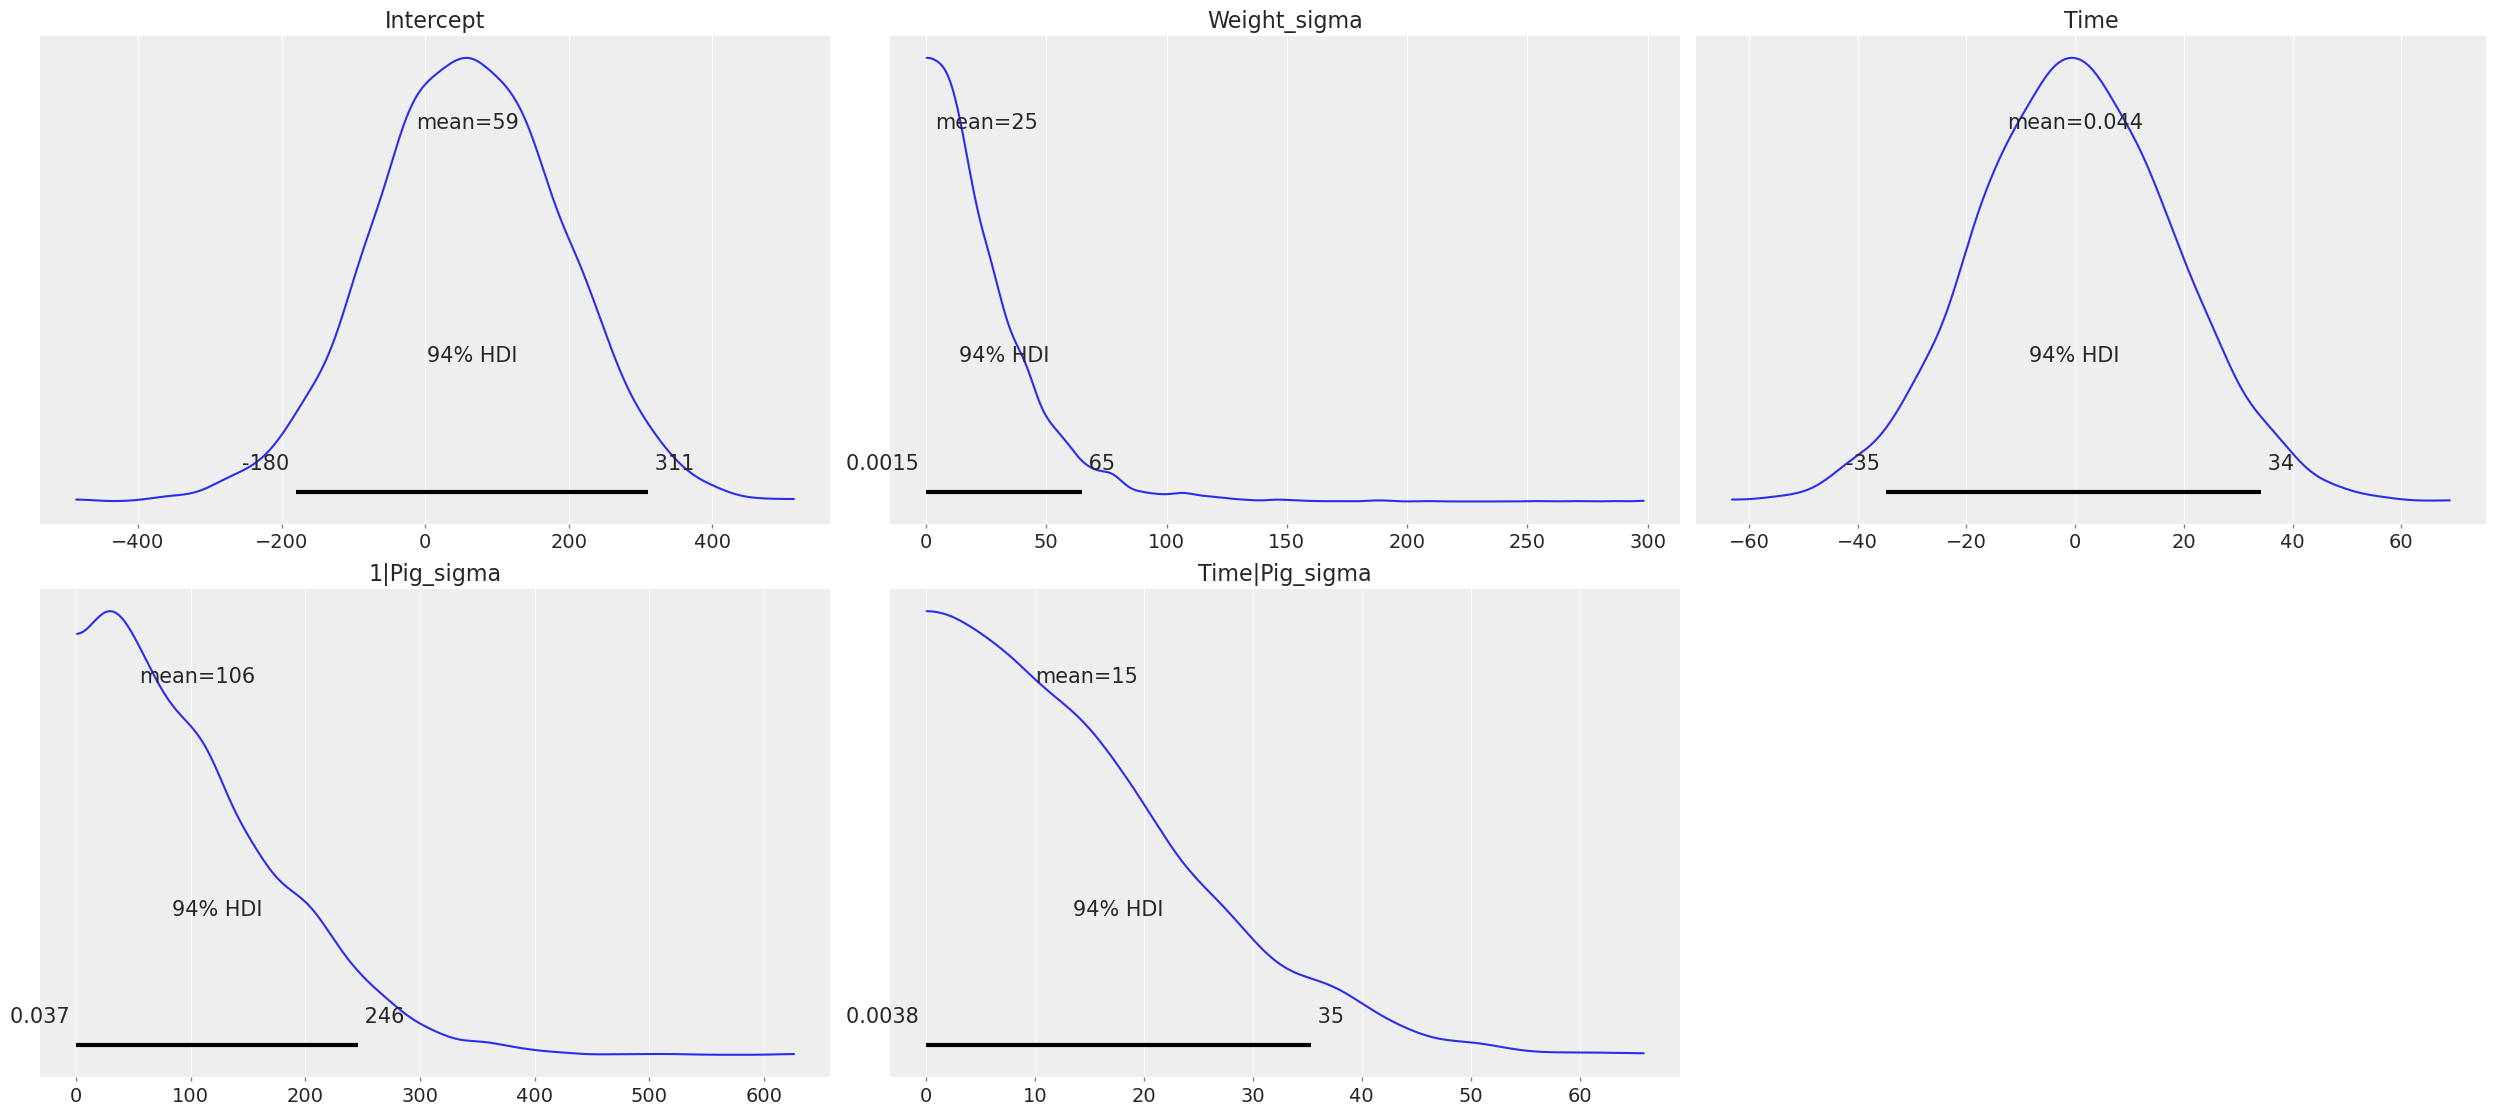

In [16]:
model.plot_priors();

### Chains convergence

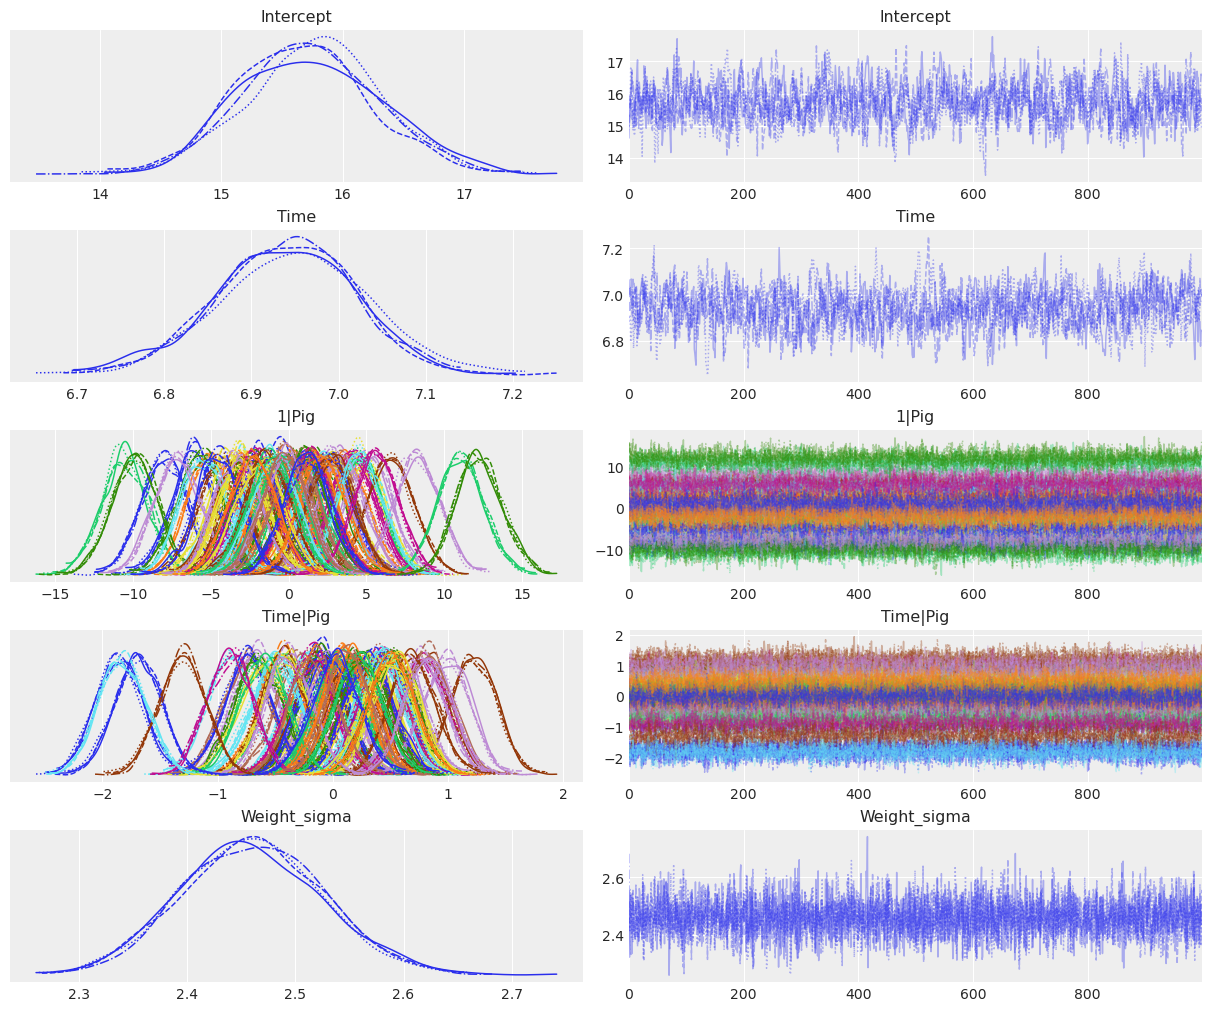

In [17]:
az.plot_trace(
                results,
                var_names = ["Intercept", "Time", "1|Pig", "Time|Pig", "Weight_sigma"],
                compact = True
);

In [19]:
az.summary(
            results,
            var_names = ["Intercept", "Time", "1|Pig", "Time|Pig", "Weight_sigma"]
)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,15.727,0.576,14.710,16.843,0.021,0.015,730.0,1407.0,1.0
Time,6.940,0.082,6.792,7.099,0.003,0.002,629.0,1357.0,1.0
1|Pig[4601],-0.594,1.485,-3.417,2.202,0.029,0.021,2517.0,3059.0,1.0
1|Pig[4602],0.373,1.497,-2.303,3.254,0.030,0.021,2571.0,2952.0,1.0
1|Pig[4603],2.152,1.477,-0.776,4.802,0.030,0.021,2468.0,2542.0,1.0
...,...,...,...,...,...,...,...,...,...
Time|Pig[8273],0.831,0.204,0.443,1.208,0.004,0.003,2525.0,2568.0,1.0
Time|Pig[8437],0.131,0.198,-0.233,0.502,0.004,0.003,2407.0,3169.0,1.0
Time|Pig[8439],0.020,0.211,-0.360,0.429,0.004,0.003,2562.0,2796.0,1.0
Time|Pig[8442],0.512,0.204,0.143,0.912,0.004,0.003,2462.0,2642.0,1.0


### Regression line

#### Filter for pig 4601

In [36]:
# Id of the pig is '4601'

df_4601 = (df
          .query('Pig == 4601')
          .filter(['Time', 'Weight'])

)

time = np.array([1, 12])

### Extract posterior

In [37]:
post = az.extract_dataset(results);

post

C:\Users\bacos1\AppData\Local\Temp\ipykernel_10972\285539362.py:1: FutureWarning: extract_dataset has been deprecated, please use extract
  post = az.extract_dataset(results);


<xarray.Dataset>
Dimensions:          (sample: 4000, Pig__factor_dim: 72)
Coordinates:
  * Pig__factor_dim  (Pig__factor_dim) <U4 '4601' '4602' ... '8439' '8442'
  * sample           (sample) object MultiIndex
  * chain            (sample) int32 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3
  * draw             (sample) int32 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
Data variables:
    Intercept        (sample) float64 14.91 15.13 15.58 ... 16.29 16.61 16.52
    Time             (sample) float64 7.002 7.006 7.027 ... 7.009 7.005 6.991
    Weight_sigma     (sample) float64 2.554 2.506 2.375 ... 2.443 2.486 2.429
    1|Pig_sigma      (sample) float64 4.753 4.61 4.698 ... 5.116 5.062 5.174
    Time|Pig_sigma   (sample) float64 0.7454 0.7654 0.7764 ... 0.6612 0.7001
    1|Pig            (Pig__factor_dim, sample) float64 -1.235 -1.626 ... -2.262
    Time|Pig         (Pig__factor_dim, sample) float64 0.00335 ... 0.2379
Attributes:
    created_at:                  2023-09-20T13:05:51.745411
    arviz_version:               0.16.0
    inference_library:           pymc
    inference_library_version:   5.6.1
    sampling_time:               29.679307222366333
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.12.0

In [31]:
interCommon = post['Intercept']

slopeCommon = post['Time']

In [32]:
inter4601 = post['1|Pig'].sel(Pig__factor_dim="4601")

slope4601 = post['Time|Pig'].sel(Pig__factor_dim="4601")

In [34]:
a = (interCommon + inter4601)
b = (slopeCommon + slope4601)

In [38]:
timeXi = xr.DataArray(time)

### Plot regression

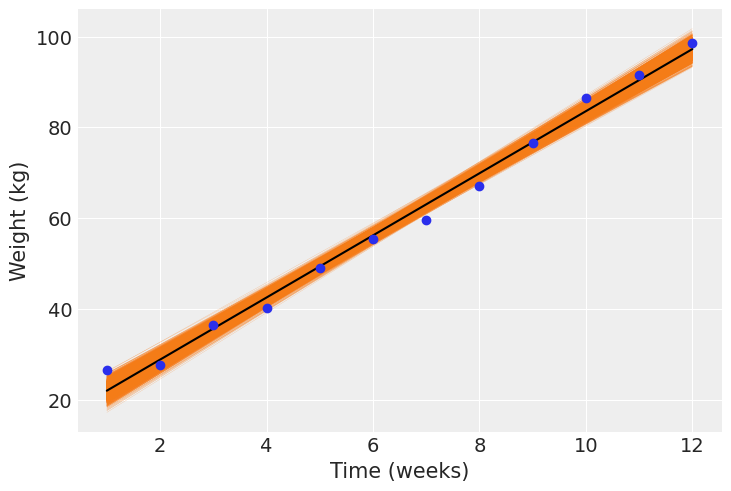

In [40]:
plt.plot(timeXi, (a + b * timeXi).T, color="C1", lw=0.1)
plt.plot(timeXi, a.mean() + b.mean() * timeXi, color="black")
plt.scatter(df_4601["Time"], df_4601["Weight"], zorder=2)
plt.ylabel("Weight (kg)")
plt.xlabel("Time (weeks)");

### Regression for all pigs

In [41]:
interGroupSpec = post['1|Pig']

slopeGroupSpec = post['Time|Pig']

In [44]:
a = interCommon.mean() + interGroupSpec.mean('sample')

b = slopeCommon.mean() + slopeGroupSpec.mean('sample')

timeXi = xr.DataArray(time)

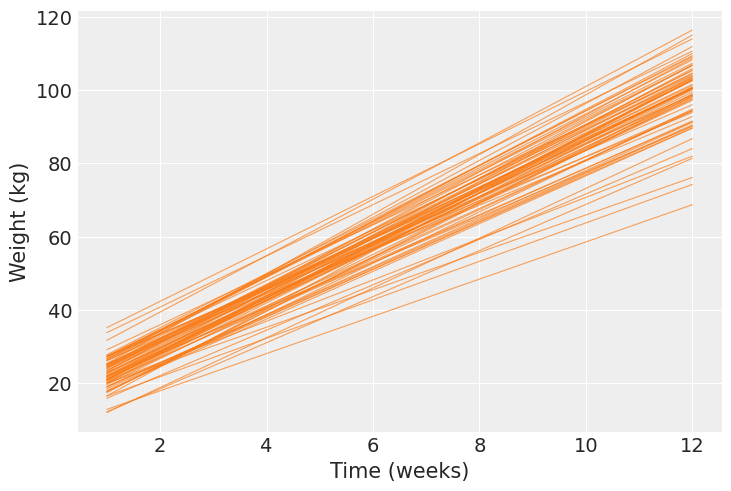

In [45]:
plt.plot(timeXi, (a + b * timeXi).T, color="C1", alpha=0.7, lw=0.8)
plt.ylabel("Weight (kg)")
plt.xlabel("Time (weeks)");

### Effects details

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

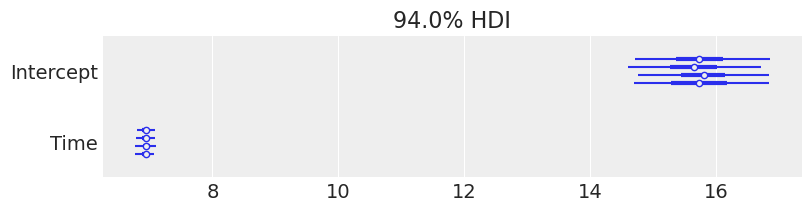

In [46]:
az.plot_forest(
                results,
                var_names=['Intercept', 'Time'],
                figsize = (8, 2)
)